In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\jdgoe\OneDrive\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [3]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

Let's look at the different questions being asked.

In [5]:
df['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [7]:
unique_pairs = set(tuple(pair) for pair in df[['Question', 'QuestionID']].values)
print(unique_pairs)

{('Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Q043'), ('Percent of adults aged 18 years and older who have obesity', 'Q036'), ('Percent of adults who engage in muscle-strengthening activities on 2 or more days a week', 'Q046'), ('Percent of adults who report consuming vegetables less than one time daily', 'Q019'), ('Percent of adults who engage in no leisure-time physical activity', 'Q047'), ('Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Q045'), ('Percent of adults who report consuming fruit less than one time daily', 'Q018'), ('Percent of adults aged 18 years and older who have an overweight classification', 'Q037'), ('Percent of adults who achieve at least 150 minutes a week o

In [9]:
df = df.fillna(0)

In [9]:
# Group our data by attributes of concern
grouped_df = df.groupby(['Question', 'Gender', 'Age(years)', 'Income'])['Data_Value'].mean().reset_index()

In [38]:
print(grouped_df)

Empty DataFrame
Columns: [Question, Gender, Age(years), Income, Data_Value]
Index: []


In [34]:
mean_response = grouped_df['Data_Value'].mean()

In [8]:
grouped_df = df.groupby(['LocationDesc', 'Question'])['Data_Value'].mean().reset_index()

In [9]:
pivot_df = grouped_df.pivot_table(index='LocationDesc', columns='Question', values='Data_Value', aggfunc='mean')

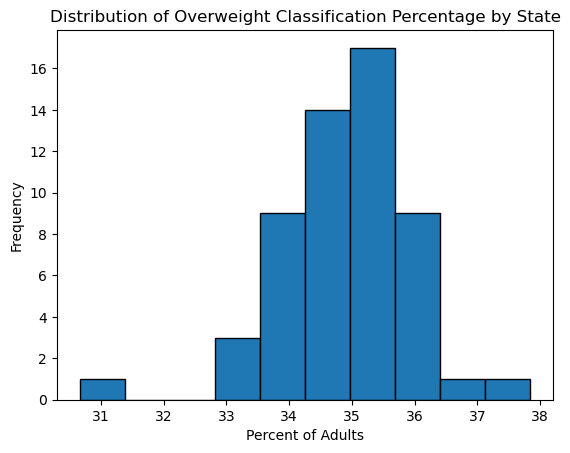

In [10]:
pivot_df['Percent of adults aged 18 years and older who have an overweight classification'].hist(edgecolor='black')
plt.title('Distribution of Overweight Classification Percentage by State')
plt.xlabel('Percent of Adults')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Let's set the median overweight classification as our cutoff point for low/high overweight

In [11]:
pivot_df["High Overweight"] = pivot_df['Percent of adults aged 18 years and older who have an overweight classification'] >= pivot_df['Percent of adults aged 18 years and older who have an overweight classification'].median()

In [12]:
pivot_df = pivot_df.drop(columns=['Percent of adults aged 18 years and older who have obesity'])

In [13]:
pivot_df.columns

Index(['Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who report consuming fruit less than o

In [14]:
pivot_df = pivot_df.rename(columns={'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week': 'at least 150 minutes a week of moderate-intensity/ muscle strengthening 2 or more days a week'})

In [15]:
X = pivot_df.drop(['Percent of adults aged 18 years and older who have an overweight classification', "High Overweight"], axis = 1)
y = pivot_df['High Overweight']

In [16]:
X = pivot_df.drop(['Percent of adults aged 18 years and older who have an overweight classification', "High Overweight"], axis = 1)
y = pivot_df['High Overweight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state = 24)
tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
# Calculate accuracy, precision, recall, f1
print("Accuracy:", round(accuracy_score(y_test,y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

Accuracy: 0.727
Precision: 0.83
Recall: 0.71
F1 Score: 0.77


In [17]:
# Calculate accuracy, precision, recall, f1
print("Accuracy:", round(accuracy_score(y_test,y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

Accuracy: 0.727
Precision: 0.83
Recall: 0.71
F1 Score: 0.77


In [18]:
tree.classes_ 

array([False,  True])

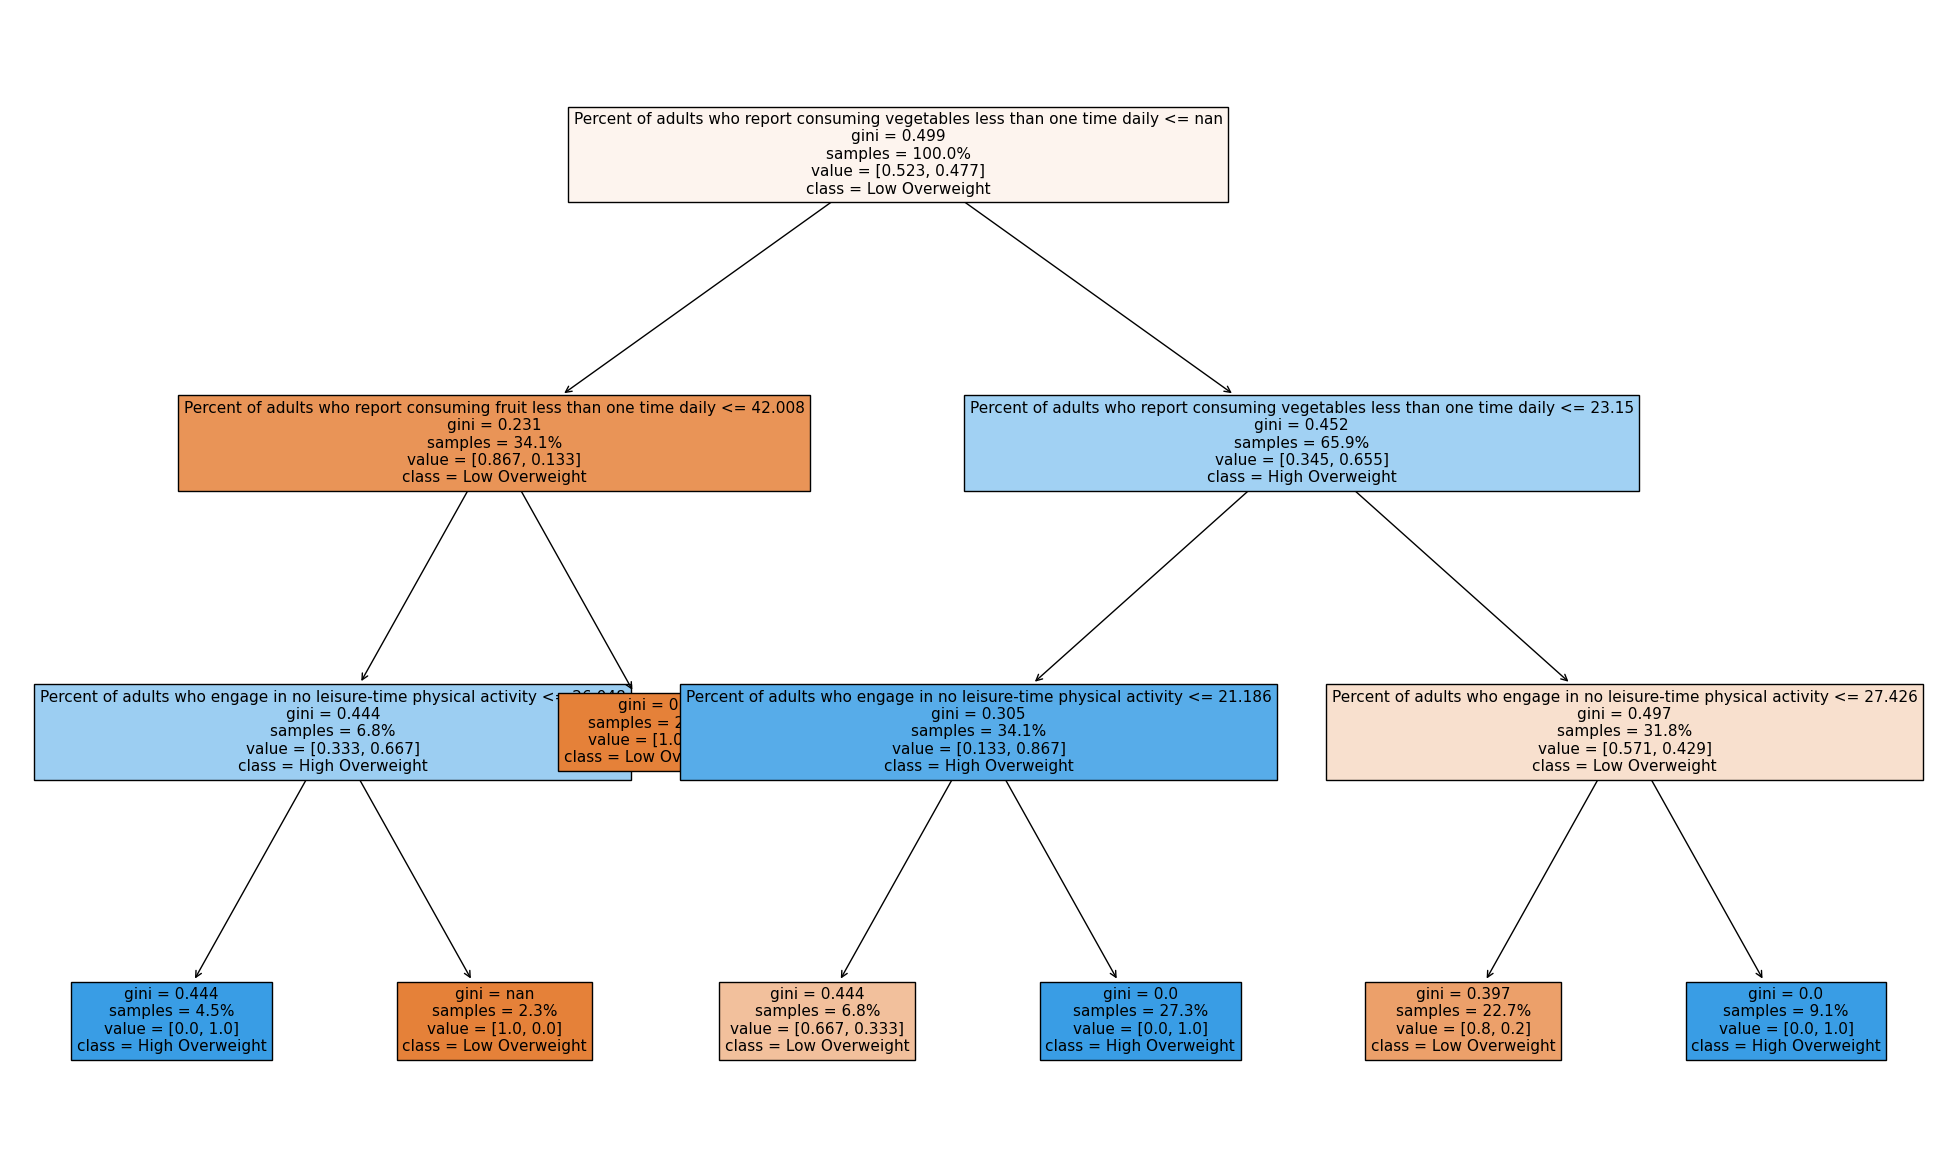

In [19]:
plt.figure(figsize = [25.0, 15])
# Plotting the tree with some specific parameters
_ = plot_tree(tree, 
              feature_names = list(X.columns), 
              class_names = ["Low Overweight", "High Overweight"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11)

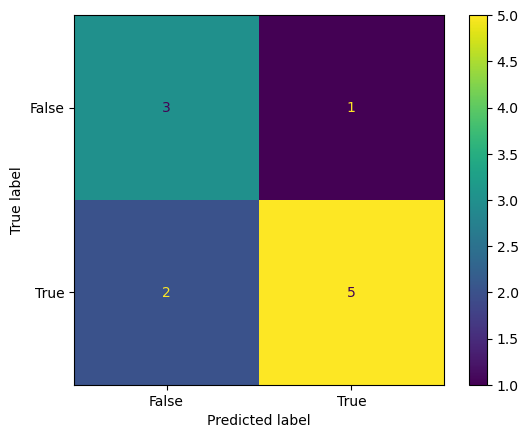

In [20]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree.classes_)

disp.plot()
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv = 4)
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv = 4, 
                             scoring= ("precision", "recall", "f1") )
print("Mean Cross Validation Accuracy", scores.mean().round(2))
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validation Accuracy 0.71
Mean Cross Validated Precision: 0.83
Mean Cross Validated Recall: 0.61
Mean Cross Validated F1: 0.66


In [22]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv = 4, 
                             scoring= ("precision", "recall", "f1") )

In [23]:
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated Precision: 0.83
Mean Cross Validated Recall: 0.61
Mean Cross Validated F1: 0.66


In [24]:
from sklearn.impute import SimpleImputer
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = 0.20, shuffle = True, random_state = 24)

In [25]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

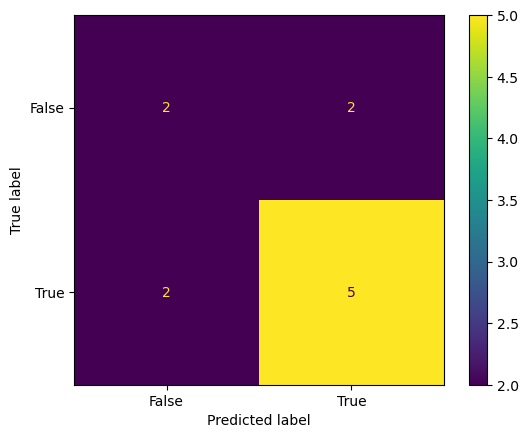

In [26]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = 0.20, shuffle = True, random_state = 24)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
score = knn.score(X_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)  
disp.plot()
plt.show()

In [27]:
# Calculate accuracy, precision, recall, f1
print("Accuracy:", round(accuracy_score(y_test,y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

Accuracy: 0.636
Precision: 0.71
Recall: 0.71
F1 Score: 0.71


In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X_imputed, y, cv = 4)
print("Cross Validation Accuracy Scores:", scores.round(2)) 
print("Mean Cross Validation Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.57 0.86 0.79 0.62]
Mean Cross Validation Score: 0.71


In [29]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree, 
                             X_imputed, y, cv = 4, 
                             scoring= ("precision", "recall", "f1") )

print("Mean Cross Validated Accuracy:", scores.mean().round(2))
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated Accuracy: 0.71
Mean Cross Validated Precision: 0.9
Mean Cross Validated Recall: 0.5
Mean Cross Validated F1: 0.63


In [30]:
! jupyter nbconvert -- to html Module_3_Prgramming_Assignment.ipynb

Traceback (most recent call last):
  File "C:\Users\jdgoe\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 6, in <module>
    from nbconvert.nbconvertapp import main
  File "C:\Users\jdgoe\Anaconda3\lib\site-packages\nbconvert\__init__.py", line 3, in <module>
    from . import filters, postprocessors, preprocessors, writers
  File "C:\Users\jdgoe\Anaconda3\lib\site-packages\nbconvert\filters\__init__.py", line 8, in <module>
    from .markdown import *
  File "C:\Users\jdgoe\Anaconda3\lib\site-packages\nbconvert\filters\markdown.py", line 13, in <module>
    from .markdown_mistune import markdown2html_mistune
  File "C:\Users\jdgoe\Anaconda3\lib\site-packages\nbconvert\filters\markdown_mistune.py", line 37, in <module>
    class MathBlockGrammar(mistune.BlockGrammar):
AttributeError: module 'mistune' has no attribute 'BlockGrammar'
